### importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## data preprossing

### training image preprossing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### validatin image preprossing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[138.75 124.75 141.75]
   [138.25 124.25 141.25]
   [137.25 123.25 140.25]
   ...
   [187.25 179.25 190.25]
   [183.   175.   186.  ]
   [184.5  176.5  187.5 ]]

  [[134.25 120.25 137.25]
   [133.5  119.5  136.5 ]
   [144.5  130.5  147.5 ]
   ...
   [186.25 178.25 189.25]
   [182.25 174.25 185.25]
   [179.75 171.75 182.75]]

  [[141.   127.   144.  ]
   [139.75 125.75 142.75]
   [132.   118.   135.  ]
   ...
   [190.   182.   193.  ]
   [184.5  176.5  187.5 ]
   [179.   171.   182.  ]]

  ...

  [[127.   111.   124.  ]
   [142.25 126.25 139.25]
   [138.5  122.5  135.5 ]
   ...
   [144.25 132.25 144.25]
   [147.75 135.75 147.75]
   [140.75 128.75 140.75]]

  [[142.5  126.5  139.5 ]
   [142.25 126.25 139.25]
   [143.5  127.5  140.5 ]
   ...
   [140.75 128.75 140.75]
   [130.75 118.75 130.75]
   [140.75 128.75 140.75]]

  [[132.5  116.5  129.5 ]
   [156.5  140.5  153.5 ]
   [134.75 118.75 131.75]
   ...
   [129.5  117.5  129.5 ]
   [127.25 115.25 127.25]
   [139.75 127.75 13

### to avoid overshooting
1. choose smal learning rate
2. there may be chance of underfitting , so increase number of neurons
3. add more convolution layers to extract more feature from images
there may be possiblility that model unable to capture relevent 
fearure or model confusing due to lack if features so feed more features
 ###'''

### Building model

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [35]:
model = Sequential()

### building convolution layer

In [38]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [40]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [42]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25))#to avoid overfitting

In [50]:
model.add(Flatten())


In [52]:
model.add(Dense(units=1500,activation='relu'))


In [54]:
model.add(Dropout(0.4))


### outputlater

In [57]:
model.add(Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,768,970 (29.64 MB)

 Trainable params: 7,768,970 (29.64 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
#model train

In [64]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1038s 471ms/step - accuracy: 0.4086 - loss: 2.0999 - val_accuracy: 0.8621 - val_loss: 0.4268
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 993s 452ms/step - accuracy: 0.8383 - loss: 0.5131 - val_accuracy: 0.8405 - val_loss: 0.5062
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 982s 447ms/step - accuracy: 0.9031 - loss: 0.2977 - val_accuracy: 0.9042 - val_loss: 0.3011
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 971s 442ms/step - accuracy: 0.9334 - loss: 0.2058 - val_accuracy: 0.9374 - val_loss: 0.1927
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 977s 444ms/step - accuracy: 0.9509 - loss: 0.1516 - val_accuracy: 0.9373 - val_loss: 0.1896
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 976s 444ms/step - accuracy: 0.9616 - loss: 0.1159 - val_accuracy: 0.9552 - val_loss: 0.1422
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 991s 451ms/step - accuracy: 0.9700 - loss: 0.0916 - val_accuracy: 0.9553 - val_loss: 0.1398
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1064s 484ms/step - 

### MODEL EVALUATION



In [67]:
#model eval on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 288s 131ms/step - accuracy: 0.9929 - loss: 0.0246


In [69]:
print(train_loss,train_acc)

0.021753892302513123 0.9936837553977966


In [81]:
#model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 63s 114ms/step - accuracy: 0.9676 - loss: 0.1103


In [83]:
print(val_loss,val_acc)

0.11424057185649872 0.9668222069740295


### saving modekl

In [106]:
model.save("trained_model.keras")

In [108]:
training_history.history

{'accuracy': [0.6087915301322937,
  0.8592076301574707,
  0.9133651256561279,
  0.9394835829734802,
  0.954619824886322,
  0.9629703164100647,
  0.9710648059844971,
  0.9758304357528687,
  0.9777366518974304,
  0.9828437566757202],
 'loss': [1.3286774158477783,
  0.44580966234207153,
  0.2661914825439453,
  0.18806707859039307,
  0.14081868529319763,
  0.11187836527824402,
  0.08868587017059326,
  0.07394587248563766,
  0.06717083603143692,
  0.05532225966453552],
 'val_accuracy': [0.8621101975440979,
  0.8404848575592041,
  0.9042226076126099,
  0.9374004006385803,
  0.9373434782028198,
  0.9552128314971924,
  0.9552697539329529,
  0.9582290053367615,
  0.9658547639846802,
  0.9668222069740295],
 'val_loss': [0.42679718136787415,
  0.5062341690063477,
  0.3010609447956085,
  0.19268575310707092,
  0.18960432708263397,
  0.1421670764684677,
  0.13983915746212006,
  0.13900887966156006,
  0.10826779156923294,
  0.11424052715301514]}

In [114]:
#recording history in json
import json
with open("training_hist.json","w") as f :
    json.dump(training_history.history,f)

### accuracy visualization

In [137]:
training_history.history['val_accuracy']

[0.8621101975440979,
 0.8404848575592041,
 0.9042226076126099,
 0.9374004006385803,
 0.9373434782028198,
 0.9552128314971924,
 0.9552697539329529,
 0.9582290053367615,
 0.9658547639846802,
 0.9668222069740295]

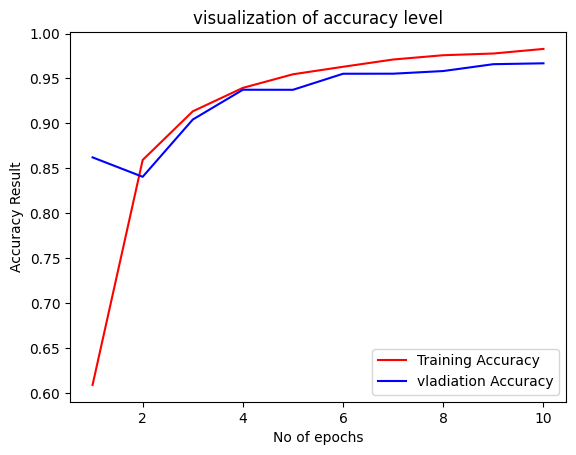

In [149]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='vladiation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of accuracy level")
plt.legend()
plt.show()

### some other matrix for model evaluation

In [156]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [158]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [164]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 69s 126ms/step


(array([[9.99997258e-01, 2.18114993e-09, 1.55421433e-12, ...,
         1.57469439e-14, 2.21624917e-14, 1.34833984e-13],
        [1.00000000e+00, 4.40019188e-10, 1.03330816e-13, ...,
         2.97633746e-17, 2.43339040e-16, 4.97946900e-16],
        [1.00000000e+00, 5.39162603e-11, 5.62156641e-11, ...,
         1.48069755e-15, 9.02674677e-14, 2.10461816e-13],
        ...,
        [4.68123484e-10, 9.90464741e-12, 4.12598755e-09, ...,
         5.10828662e-12, 1.22846178e-10, 9.99999285e-01],
        [1.41806877e-09, 1.05237199e-11, 1.42314720e-08, ...,
         1.22298205e-11, 1.53887555e-10, 1.00000000e+00],
        [1.78297915e-13, 1.66281868e-14, 2.78665589e-12, ...,
         1.54637401e-14, 1.32824775e-11, 9.99999285e-01]], dtype=float32),
 (17572, 38))

In [166]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [168]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [172]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [176]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [218]:
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.90      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [224]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### confusion matrix visualization

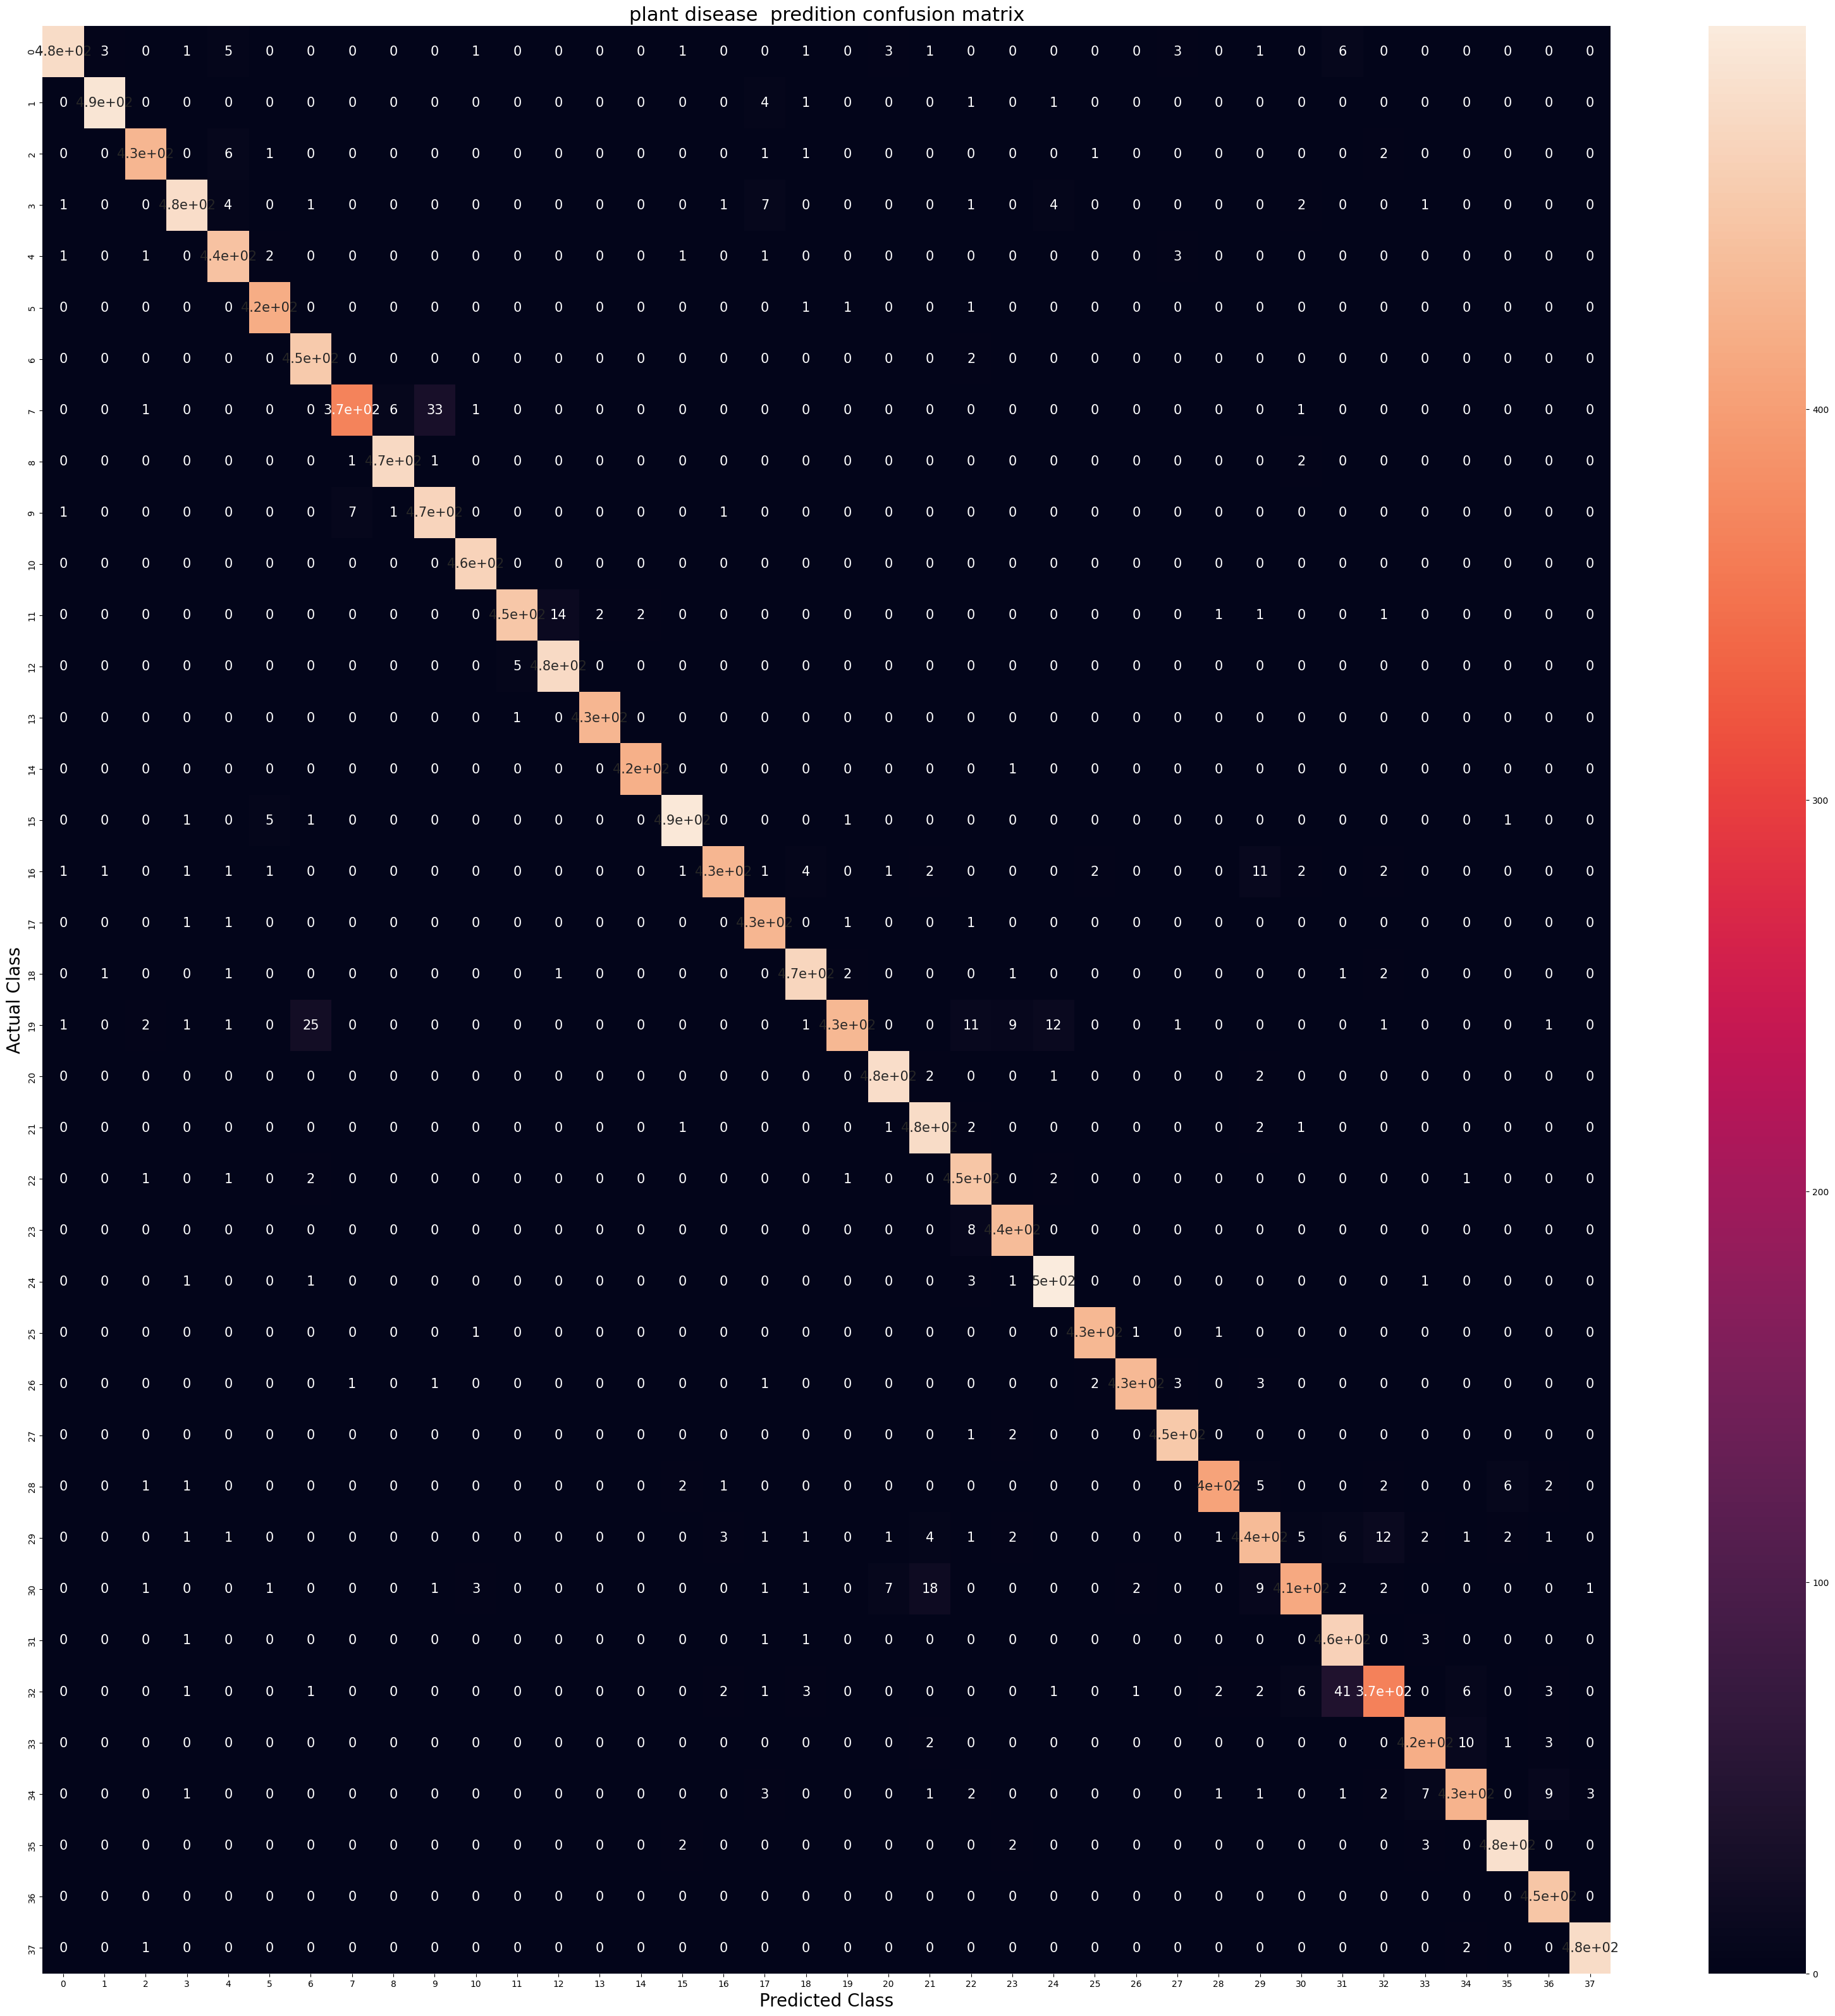

In [251]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("plant disease  predition confusion matrix",fontsize=22)
plt.show()